<h1 style="color:navy">Airbnb Exploratory Data Analysis</h1>

I would like to explore the property sizes and types available on Airbnb within New York City. I will be using bedroom number as a pseduo-variable for actual property size, under the logic that a 5 bedroom property will be larger than that of a 2 bedroom. However I will also compare this with the number of people a property accommodates as a sense-check.
The questions I am considering are:
* What property sizes and types are available in NYC? Is there any correlation between the two?
* What is the most popular property size and/or type?
* Are these properties localised? (i.e. larger properties only in one area)
* Is it most cost effective to get a larger property? (Examined looking at price per bedroom) Does this change if looking at price per person (accommodates)?
* Are there any other benefits to choosing a larger property - for example, do they come with more amenities? Are amenities localised?

Steps to complete: 
1. Check columns, subset data to only columns which will be useful
2. Data cleaning - remove rows which are full of NaNs - consider what to do with any other NaNs if present
3. Explore property size and type distributions, histograms should work well?
4. Explore correlation between property size and type
5. Complete a heat map for each of these - are they localised?
6. Calculate 'price per bedroom' and decide best way to show this? Another histogram? Box/violin plot? Scatter/line plot to show changes over time?
7. Bar/scatter plots for prices of plots with less availability?
8. Explore amenity data - group into categories and check the amenities column/dict also. Do larger properties have more amenities?
9. Heat map amenity score to see if these are localised?
10. Count variables for host x property - order by top 'count' - do hosts have multiple properties? What are their sizes/locations/prices?


In [1]:
#importing useful libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import folium

In [11]:
#importing the dataset, airbnb nyc, and checking it loads in correctly by checking first 5 rows and shape
listings = pd.read_csv("data/airbnb_nyc.csv")
listings.head()
listings.shape

(30179, 81)

In [16]:
#Checking columns and deciding which are useful for my EDA
listings.columns
#useful columns to keep: id (unique), host_id, host_listings_count, 
# latitude, longitude, property_type, room_type, accommodates, bathrooms (can do bathroom per person?), bedrooms,
# price, has_availability, availability_30, availability_90,
# availability_365, check_in_24h, air_conditioning, high_end_electronics,
# bbq, balcony, nature_and_views, bed_linen, breakfast, tv, coffee_machine, cooking_basics, white_goods, elevator
# gym, child_friendly, parking, outdoor_space, host_greeting, hot_tub_sauna_or_pool, internet, long_term_stays, 
# pets_allowed, private_entance, secure, self_check_in, smoking_allowed, accessible, event_suitable

#note the host listings count may not be accurate as they could be hosts worldwide? Can check out host_id

#binary amenities, categorise (very possible they don't fill this in??)
# 'property': check_in_24h, child_friendly, parking, outdoor_space, host_greeting, long_term_stays, pets_allowed,
            # private_entrance, secure, self_check_in, smoking_allowed, accessible, event_suitable, elevator, gym
# experience-amenities: air_conditioning, high_end_electronics, bbq, balcony, nature_and_views, bed_linen, breakfast
    # tv, coffee_machine, cooking_basics, white_goods, hot_tub_sauna_or_pool, internet
    
#note the 'amenities' column provides a list but it did not seem very easy or particularly useful for extraction.

Index(['id', 'name', 'summary', 'description', 'experiences_offered',
       'neighborhood_overview', 'transit', 'house_rules', 'host_id',
       'host_since', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_listings_count', 'host_identity_verified',
       'street', 'neighbourhood', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'calculated_host_listings_count',


## Property Size and Property Type in NYC

In [52]:
#subsetting data to useful variables
#property_size_type = listings[['id', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
#                              'bedrooms']]
#examining unique values in each
property_type_count = listings['property_type'].value_counts()
property_type_count

Apartment             24538
House                  2125
Condominium             982
Townhouse               772
Loft                    740
Serviced apartment      290
Hotel                   192
Guest suite             137
Other                   114
Boutique hotel          104
Bed and breakfast        63
Hostel                   43
Resort                   25
Guesthouse               24
Bungalow                 19
Aparthotel               11
Name: property_type, dtype: int64

In [59]:
#Doing a bar-plot with the above data. To make it more useful, any property_type of less than 10 will be added to 'other'
pt_var_remove = property_type_count.index[property_type_count < 10].tolist() #list of variables to change to other

#creating a dictionary to use with .replace function
var_remove_dict = {}
for i in pt_var_remove:
    var_remove_dict[i]="Other"

#replacing the noted property types to tidy data, note had to do this on original data set, not sliced
listings["property_type"] = listings["property_type"].replace(var_remove_dict)
property_type_count = listings["property_type"].value_counts()

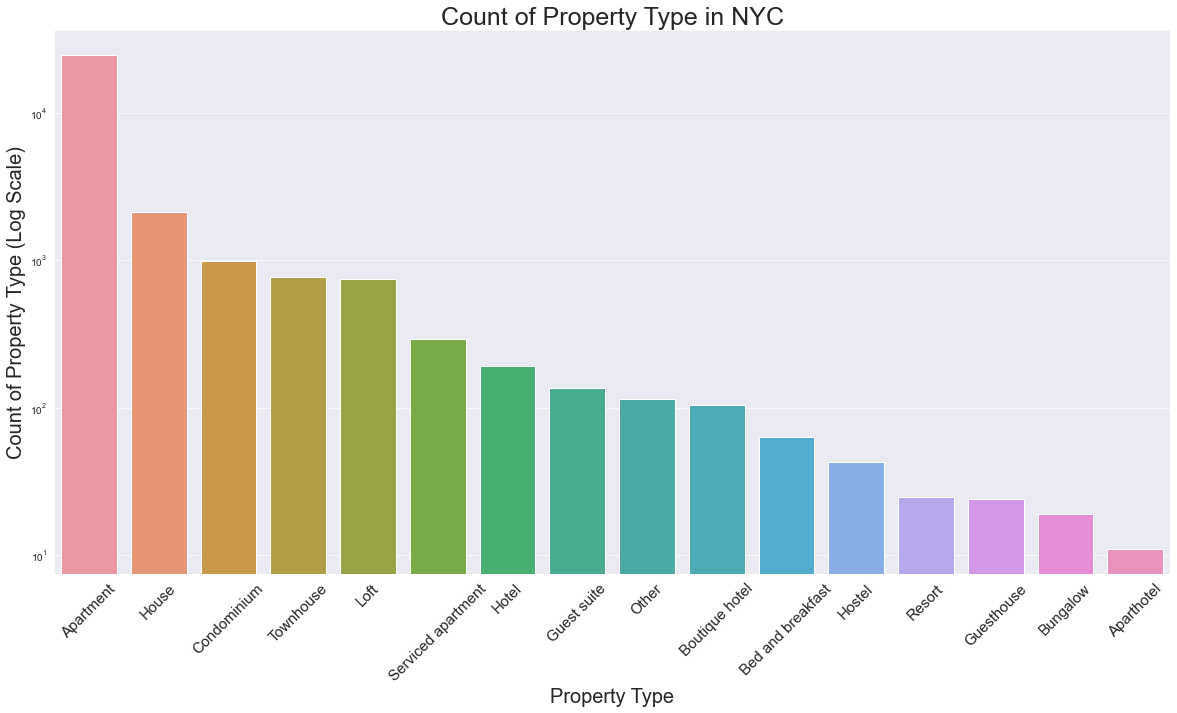

In [111]:
#Creating bar plot to show extreme variance in these
plt.figure(figsize=(20,10))
sns.barplot(x=property_type_count.index, y=property_type_count)
sns.set_style('darkgrid')
plt.yscale('log')
plt.xlabel("Property Type", fontsize=20)
plt.ylabel("Count of Property Type (Log Scale)", fontsize=20)
plt.title("Count of Property Type in NYC", fontsize=25)
plt.xticks(rotation=45, fontsize=15)
plt.show()

####### Try and add values if time???!!!

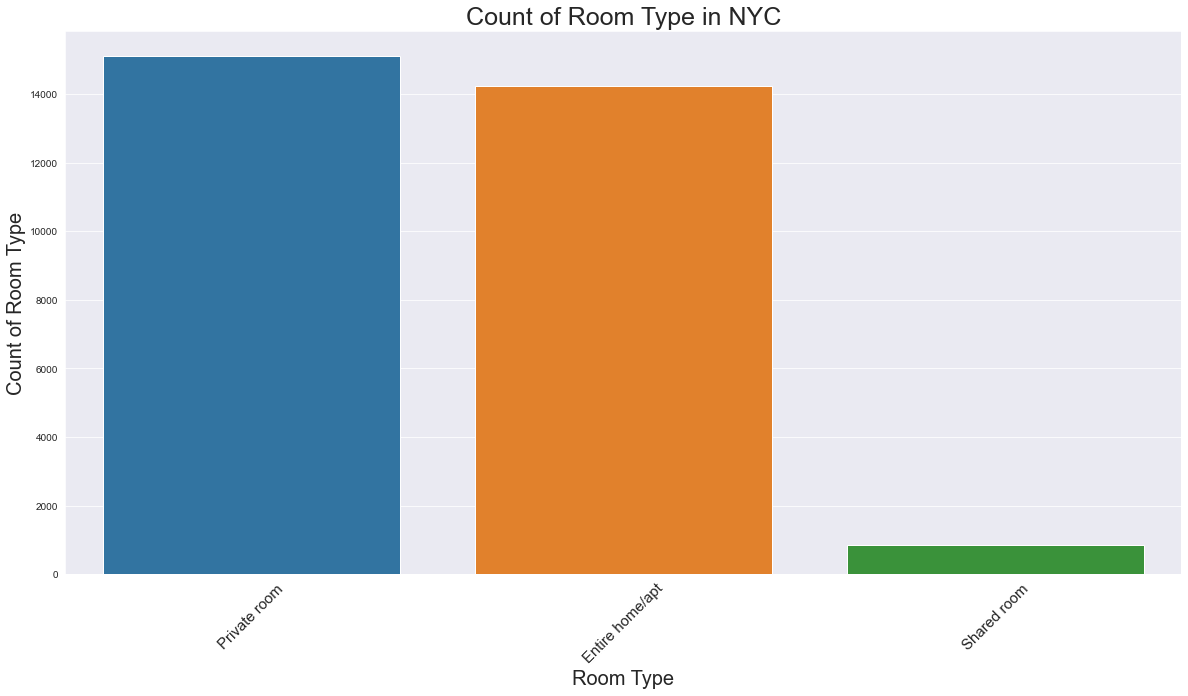

In [110]:
room_type_count = listings['room_type'].value_counts()

#Creating bar plot to show these
plt.figure(figsize=(20,10))
sns.barplot(x=room_type_count.index, y=room_type_count)
sns.set_style('darkgrid')
plt.xlabel("Room Type", fontsize=20)
plt.ylabel("Count of Room Type", fontsize=20)
plt.title("Count of Room Type in NYC", fontsize=25)
plt.xticks(rotation=45, fontsize=15)
plt.show()

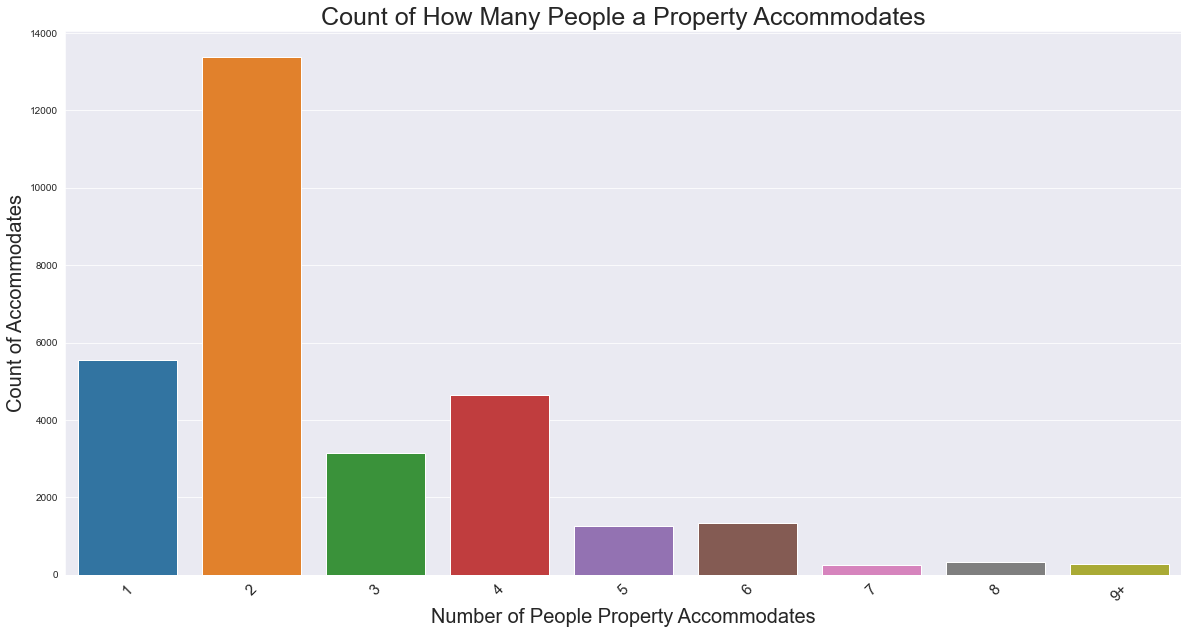

In [181]:
accommodates_count = pd.DataFrame(listings['accommodates'].value_counts()).sort_index()
accommodates_count.loc["9+"] = accommodates_count['accommodates'].loc[[9,10,11,12,13,14,15,16]].sum()
accommodates_count = accommodates_count.drop([9,10,11,12,13,14,15,16])

#Creating bar plot to show this
plt.figure(figsize=(20,10))
sns.barplot(x=accommodates_count.index, y=accommodates_count['accommodates'])
sns.set_style('darkgrid')
plt.xlabel("Number of People Property Accommodates", fontsize=20)
plt.ylabel("Count of Accommodates", fontsize=20)
plt.title("Count of How Many People a Property Accommodates", fontsize=25)
plt.xticks(rotation=45, fontsize=15)
#plt.yscale('log')
plt.show()

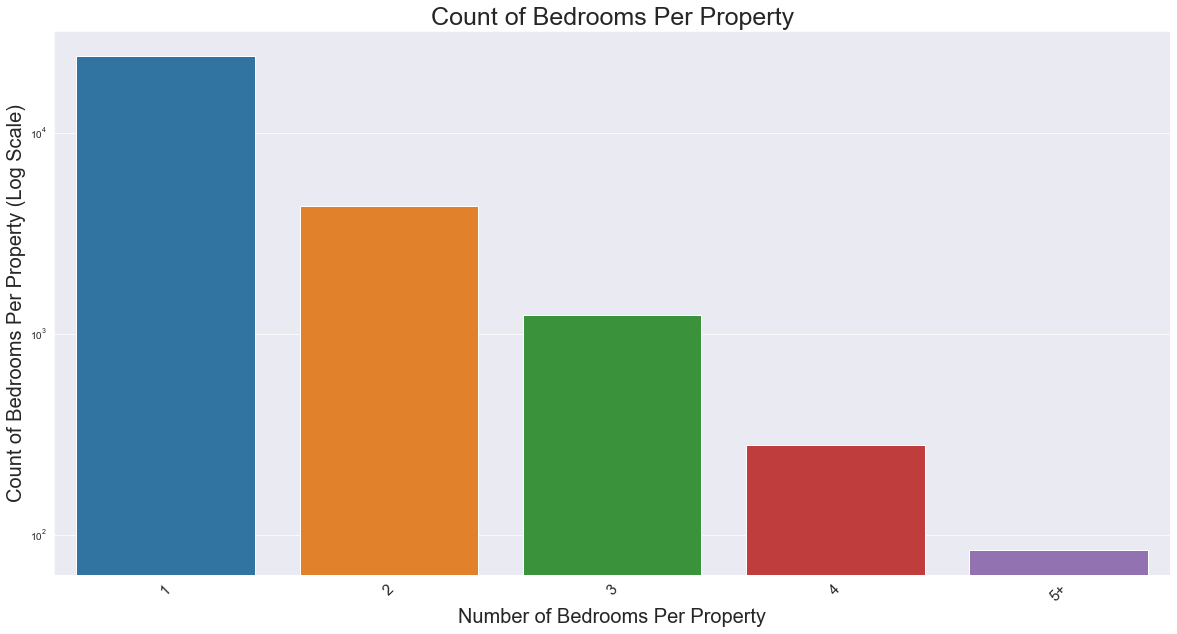

In [190]:
bedrooms_count = pd.DataFrame(listings['bedrooms'].value_counts()).sort_index()
bedrooms_count.loc["5+"] = bedrooms_count['bedrooms'].loc[[5, 6, 7, 8, 11]].sum()
bedrooms_count = bedrooms_count.drop([5, 6, 7, 8, 11])

#Creating bar plot to show this
plt.figure(figsize=(20,10))
sns.barplot(x=bedrooms_count.index, y=bedrooms_count['bedrooms'])
sns.set_style('darkgrid')
plt.xlabel("Number of Bedrooms Per Property", fontsize=20)
plt.ylabel("Count of Bedrooms Per Property (Log Scale)", fontsize=20)
plt.title("Count of Bedrooms Per Property", fontsize=25)
plt.xticks(rotation=45, fontsize=15)
plt.yscale('log')
plt.show()

In [182]:
### Considering putting the above in a grid-style multi-chart layout

## Considering correlation between accommodates, bedrooms, and availability

<AxesSubplot:>

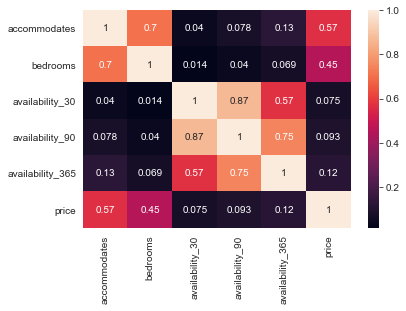

In [193]:
size_type_subset = listings[['accommodates', 'bedrooms', 'availability_30', 'availability_90', 'availability_365',
                            'price']]
sns.heatmap(size_type_subset.corr(), annot=True)

#strong correlation between accommodates & bedrooms, as expected, which is good and shows people aren't crammed into rooms
#Correlation between price & accommodates/bedrooms, higher price, higher accomm, also as expected
#no correlation between availability & property size/accommodates, suggests a variety of places are being booked


In [197]:
## Could try charting some 'group by'
# Property type, hue room type
# Property type, hue accommodates
# Property type, hue bedrooms
# Accommodates, hue room type
# Bedrooms, hue room type

## Looking at value per money, price per accommodates vs. price per bedroom
plot price per bedroom vs number of bedrooms
plot price per bedroom vs price per accommodates (box plot comparison)

In [ ]:
# Create new variables: price per bedroom, price per accommodates

In [203]:
listings['price_per_bedroom'] = (listings['price']/listings['bedrooms'])
#listings[['price', 'bedrooms','price_per_bedroom']].head()
listings['price_per_accomm'] = (listings['price']/listings['accommodates'])
listings[['price', 'bedrooms', 'accommodates','price_per_bedroom', 'price_per_accomm']].head()

,price,bedrooms,accommodates,price_per_bedroom,price_per_accomm
0,149,1,2,149.0,74.5
1,150,1,2,150.0,75.0
2,190,2,4,95.0,47.5
3,60,1,2,60.0,30.0
4,80,1,2,80.0,40.0


<AxesSubplot:xlabel='bedrooms', ylabel='price_per_bedroom'>

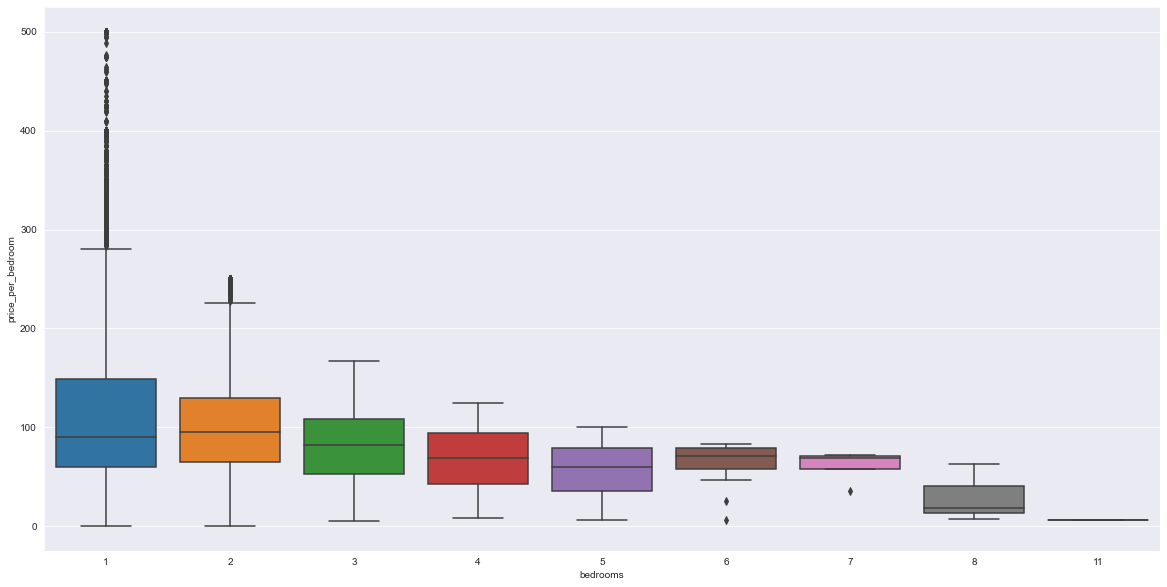

In [207]:
plt.figure(figsize=(20,10))
sns.boxplot(data=listings, x='bedrooms', y='price_per_bedroom')

### Tidy this up to be '5+' bedrooms to match before
# Add title, axis, etc.

<AxesSubplot:xlabel='accommodates', ylabel='price_per_accomm'>

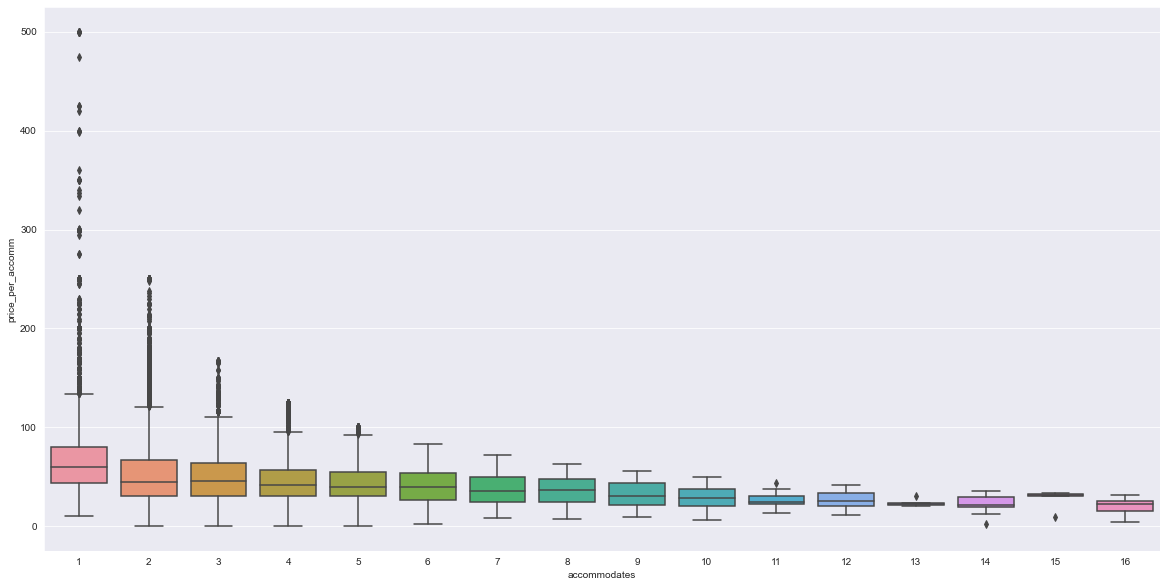

In [208]:
plt.figure(figsize=(20,10))
sns.boxplot(data=listings, x='accommodates', y='price_per_accomm')

## As above, edit to be 9+ grouped together

In [222]:
# Get some summary stats for these numbers

listings.groupby("accommodates")[['price_per_accomm', 'price_per_bedroom']].mean()
# .describe() gets summary stats
## sort variables of accommodates and bedrooms to be 9+, 5+ etc to get more accurate summaries

,price_per_accomm,price_per_bedroom
accommodates,,
1,69.209462,68.056537
2,54.177354,106.780867
3,49.911344,138.999232
4,45.932506,137.980581
5,43.737460,125.126601
6,41.429353,114.306468
7,37.838059,106.584478
8,35.509041,99.263103
9,31.410431,89.308795


## Looking at location of larger and smaller properties, is there a 'hotspot' for larger ones?
Gap in the market??

In [210]:
from folium.plugins import HeatMap
lat = listings['latitude'][5]
lon = listings['longitude'][5]
folium_hmap = folium.Map(location=[lat,lon], 
                         zoom_start=9, 
                         tiles="CartoDB positron")
folium_hmap.add_child(
    HeatMap(listings[['latitude', 'longitude', 'bedrooms']],
            radius=30, min_opacity=0.2, blur=15))

##Mess around with parameters to get best 'story'

In [215]:
from folium.plugins import HeatMap
lat = listings['latitude'][5]
lon = listings['longitude'][5]
folium_hmap = folium.Map(location=[lat,lon], 
                         zoom_start=9, 
                         tiles="CartoDB positron")
folium_hmap.add_child(
    HeatMap(listings[['latitude', 'longitude', 'price_per_accomm']],
            radius=30, min_opacity=0.2, blur=15))

##Mess around with parameters to get best 'story'

## If time, look at property size vs number of amenities
Create an amenity score (two categories, outlined above)
Compare this to number of bedrooms/correlation/heatplot
Are properties with higher number of amenities in a select location?

In [ ]:
#Additional/future analysis: 
#What makes a property popular? Is it price, amenities, size, location?
#Are some hosts dominating the market in NYC?